In [1]:
import pandas as pd
import numpy as np
import os
import re

In [331]:
import pysal as ps

In [218]:
import geopandas as gpd
import scipy.stats as scs

In [3]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [4]:
pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [5]:
ROOT_PATH=R'D:/Schoolwork/ucl/0097geocomputation/Data/'

In [6]:
df_london=pd.read_csv('df_london.csv')

In [8]:
london_ward=gpd.read_file(os.path.join(ROOT_PATH,r'cw_Data','london_ward_bng.shp'))
london_airbnb=gpd.read_file('london_airbnb_pro.shp')

In [17]:
london_airbnb_attribute=pd.read_csv('df_london.csv')

In [83]:
london_tube=gpd.read_file(os.path.join(ROOT_PATH,'cw_Data','tube_locations_bng.shp'))

In [161]:
london_borough=gpd.read_file(os.path.join(ROOT_PATH,'cw_Data','london_borough_bng.shp'))

In [162]:
london_river_borough=gpd.read_file(os.path.join(ROOT_PATH,'cw_Data','borough_near_thames.shp'))

In [11]:
london_airbnb_no_ward=london_airbnb[london_airbnb['ward'].isna()]

In [14]:
london_airbnb_no_ward.to_file('london_airbnb_no_ward.shp')

In [19]:
airbnb_host=london_airbnb_attribute['Features']

In [146]:
boroughlondon_river_borough['NAME'].unique()

array(['Hounslow', 'Havering', 'Lambeth', 'Southwark', 'Lewisham',
       'Greenwich', 'Bexley', 'Richmond upon Thames', 'Wandsworth',
       'Hammersmith and Fulham', 'Kensington and Chelsea', 'Westminster',
       'Tower Hamlets', 'Newham', 'Barking and Dagenham',
       'City of London'], dtype=object)

In [64]:
pt1=london_tube.iloc[0,-1]

In [84]:
pt_list=london_tube['geometry'].to_list()

In [26]:
london_airbnb_supplement=gpd.read_file('D:/Schoolwork/ucl/0097geocomputation/Data/cw_Data/point_no_ward/london_airbnb_no_ward.shp')

In [27]:
london_airbnb_supplement

,Field1,Scrape_ID,lat,lon,borough,min_distan,ward,geometry
0,1,20170304065700,51.472087,-0.206380,Hammersmith and Fulham,453.100572,Town,POINT (524670.176 176316.431)
1,3,20170304065700,51.484496,-0.206113,Hammersmith and Fulham,701.323050,North End,POINT (524654.945 177696.851)
2,19,20170304065700,51.478088,-0.206545,Hammersmith and Fulham,489.986425,Town,POINT (524642.370 176983.473)
3,20,20170304065700,51.472889,-0.203601,Hammersmith and Fulham,317.298104,Town,POINT (524861.008 176410.374)
4,29,20170304065700,51.475087,-0.206168,Hammersmith and Fulham,351.999651,Town,POINT (524676.751 176650.442)
...,...,...,...,...,...,...,...,...
1789,47255,20170304065700,51.488076,-0.210444,Hammersmith and Fulham,353.112740,North End,POINT (524344.492 178087.544)
1790,47261,20170304065700,51.486203,-0.205518,Hammersmith and Fulham,514.199582,North End,POINT (524691.604 177887.685)
1791,47265,20170304065700,51.486991,-0.198261,Hammersmith and Fulham,183.060425,North End,POINT (525193.310 177987.642)
1792,47267,20170304065700,51.476017,-0.203480,Hammersmith and Fulham,183.919742,Town,POINT (524860.853 176758.396)


In [30]:
london_whole_temp=london_airbnb.(london_airbnb_supplement,how='left',left_on='Field1',right_on='Field1',suffixes=('','_add'))

In [40]:
london_whole_temp.loc[london_whole_temp['ward'].isna(),'ward']=london_whole_temp[london_whole_temp['ward'].isna()]['ward_add']

In [45]:
london_ward['']

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."
...,...,...,...,...,...,...,...,...
644,Aldgate,E05000002,11.227,0.0,E09000001,City of London,51182,"POLYGON ((533326.100 181359.400, 533336.900 18..."
645,Broad Street,E05000008,8.188,0.0,E09000001,City of London,50669,"POLYGON ((532703.800 181263.500, 532707.800 18..."
646,Coleman Street,E05000012,15.404,0.0,E09000001,City of London,122520,"POLYGON ((532880.500 181723.400, 532884.200 18..."
647,Portsoken,E05000021,6.209,0.0,E09000001,City of London,122516,"POLYGON ((533814.300 180968.900, 533757.200 18..."


In [51]:
london_whole_temp['connect_ID']=london_airbnb_attribute['ID']

In [53]:
london_whole_temp=london_whole_temp[london_whole_temp.columns.drop(list(london_whole_temp.filter(regex='.*_add$')))]

In [55]:
london_ward.head(1)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."


In [149]:
borough_wardcode=london_ward.pivot(columns='GSS_CODE',values='BOROUGH')
borough_ward_dict={k:v.dropna().to_list()[0] for k,v in borough_wardcode.iteritems()}

In [153]:
london_whole_temp['borough_connect']=london_whole_temp['ward_code'].apply(lambda x: borough_ward_dict[x] if x in borough_ward_dict.keys() else None)

D:\Users\Fred\Miniconda3\envs\sta\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [154]:
london_whole_temp

,Field1,lat,lon,borough,min_distan,ward,geometry,connect_ID,borough_connect,ward_code
0,0,51.479399,-0.192875,Hammersmith and Fulham,183.685063,Parsons Green and Walham,POINT (525588.052 177152.582),13306958,Hammersmith and Fulham,E05000260
1,1,51.472087,-0.206380,Hammersmith and Fulham,453.100572,Town,POINT (524670.176 176316.431),5570655,Hammersmith and Fulham,E05000264
2,2,51.501831,-0.221650,Hammersmith and Fulham,347.554914,Addison,POINT (523529.367 179598.221),7668448,Hammersmith and Fulham,E05000250
3,3,51.484496,-0.206113,Hammersmith and Fulham,701.323050,North End,POINT (524654.945 177696.851),13958516,Hammersmith and Fulham,E05000258
4,4,51.473387,-0.193706,Hammersmith and Fulham,555.745054,Parsons Green and Walham,POINT (525546.793 176482.640),11632615,Hammersmith and Fulham,E05000260
...,...,...,...,...,...,...,...,...,...,...
47418,47418,51.518691,-0.140030,Westminster,404.420452,West End,POINT (529146.378 181613.851),3791899,Westminster,E05000649
47419,47419,51.508774,-0.133542,Westminster,150.882778,St. James's,POINT (529624.663 180522.517),13444410,Westminster,E05000644
47420,47420,51.514946,-0.181393,Westminster,452.066984,Lancaster Gate,POINT (526287.045 181125.283),11475526,Westminster,E05000638
47421,47421,51.517585,-0.152908,Westminster,446.979392,Marylebone High Street,POINT (528256.058 181468.250),1251720,Westminster,E05000641


In [155]:
london_glitch=london_whole_temp[london_whole_temp.apply(lambda x: x['borough']!=x['borough_connect'],axis=1)]

In [160]:
london_whole_temp.to_file('london_airbnb_pro_plus.shp')

C:\Users\Fred\AppData\Local\Temp/ipykernel_2948/1286387282.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  london_whole_temp.to_file('london_airbnb_pro_plus.shp')


In [113]:
ward_connect[ward_connect.isna()].index

Int64Index([19808], dtype='int64')

In [92]:
borough_ward_dict

{'Abbey': 'Merton',
 'Abbey Road': 'Westminster',
 'Abbey Wood': 'Greenwich',
 'Abingdon': 'Kensington and Chelsea',
 'Acton Central': 'Ealing',
 'Addiscombe': 'Croydon',
 'Addison': 'Hammersmith and Fulham',
 'Aldborough': 'Redbridge',
 'Aldersgate': 'City of London',
 'Aldgate': 'City of London',
 'Alexandra': 'Kingston upon Thames',
 'Alibon': 'Barking and Dagenham',
 'Alperton': 'Brent',
 'Ashburton': 'Croydon',
 'Askew': 'Hammersmith and Fulham',
 'Avonmore and Brook Green': 'Hammersmith and Fulham',
 'Balham': 'Wandsworth',
 'Barkingside': 'Redbridge',
 'Barnehurst': 'Bexley',
 'Barnes': 'Richmond upon Thames',
 'Barnhill': 'Hillingdon',
 'Barnsbury': 'Islington',
 'Bassishaw': 'City of London',
 'Bayswater': 'Westminster',
 'Beckton': 'Newham',
 'Becontree': 'Barking and Dagenham',
 'Beddington North': 'Sutton',
 'Beddington South': 'Sutton',
 'Bedfont': 'Hounslow',
 'Bedford': 'Wandsworth',
 'Bellingham': 'Lewisham',
 'Belmont': 'Harrow',
 'Belsize': 'Camden',
 'Belvedere': 'Be

In [54]:
london_whole_temp

,Field1,Scrape_ID,lat,lon,borough,min_distan,ward,geometry,connect_ID
0,0,20170304065700,51.479399,-0.192875,Hammersmith and Fulham,183.685063,Parsons Green and Walham,POINT (525588.052 177152.582),13306958
1,1,20170304065700,51.472087,-0.206380,Hammersmith and Fulham,453.100572,Town,POINT (524670.176 176316.431),5570655
2,2,20170304065700,51.501831,-0.221650,Hammersmith and Fulham,347.554914,Addison,POINT (523529.367 179598.221),7668448
3,3,20170304065700,51.484496,-0.206113,Hammersmith and Fulham,701.323050,North End,POINT (524654.945 177696.851),13958516
4,4,20170304065700,51.473387,-0.193706,Hammersmith and Fulham,555.745054,Parsons Green and Walham,POINT (525546.793 176482.640),11632615
...,...,...,...,...,...,...,...,...,...
47418,47418,20170304065700,51.518691,-0.140030,Westminster,404.420452,West End,POINT (529146.378 181613.851),3791899
47419,47419,20170304065700,51.508774,-0.133542,Westminster,150.882778,St. James's,POINT (529624.663 180522.517),13444410
47420,47420,20170304065700,51.514946,-0.181393,Westminster,452.066984,Lancaster Gate,POINT (526287.045 181125.283),11475526
47421,47421,20170304065700,51.517585,-0.152908,Westminster,446.979392,Marylebone High Street,POINT (528256.058 181468.250),1251720


In [169]:
london_borough['inner']=london_borough['ONS_INNER'].apply(lambda x:1 if x=='T' else 0)

In [172]:
near_river_code=london_river_borough['GSS_CODE'].to_list()

In [173]:
london_borough['near_river']=london_borough['GSS_CODE'].apply(lambda x:1 if x in near_river_code else 0)

In [185]:
london_airbnb_attribute.head(1)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,13306958,https://www.airbnb.com/rooms/13306958,20170304065726,2017-03-05,Moore Park Maisonette,My place is close to Fulham Broadway. You’ll l...,NaN,My place is close to Fulham Broadway. You’ll l...,none,Great neighbourhood in SW London.,Top floor flat.,Super well connected - busses 1 minute from ho...,All areas/,Check-in - and check-out,NaN,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,75179985,https://www.airbnb.com/users/show/75179985,Lucy,2016-06-01,GB,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/7532a1d9-2...,https://a0.muscache.com/im/pictures/7532a1d9-2...,Fulham,1.0,1.0,"email,phone","A Moore Park Road, London, SW6 2DA, United Kin...",Fulham,Hammersmith and Fulham,NaN,London,NaN,SW6 2DA,NaN,"London, United Kingdom",GB,United Kingdom,51.479399,-0.192875,Condominium,Entire home/apt,5.0,1.0,2.0,2.0,Real Bed,"Wireless Internet,Kitchen,Heating,Washer,Essen...",NaN,80.0,NaN,NaN,150.0,25.0,1.0,0.0,1.0,1125.0,9 months ago,NaN,0.0,0.0,0.0,0.0,2017-03-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"51.4793986027,-0.192874753723","Host Has Profile Pic,Is Location Exact"


In [228]:
london_whole_temp.drop(columns=['NAME','GSS_CODE','inner','near_river'],inplace=True)

In [229]:
london_whole_temp=london_whole_temp.merge(london_borough[['NAME','GSS_CODE','inner','near_river']],how='left',left_on='borough_connect',right_on='NAME')

In [230]:
analysis_location=london_whole_temp.merge(london_airbnb_attribute[['ID','Price']],left_on='connect_ID',right_on='ID',how='left')

In [231]:
analysis_location=analysis_location[~analysis_location['Price'].isna() & ~analysis_location['borough_connect'].isna()]

In [232]:
analysis_location.shape

(47369, 16)

In [364]:
scs.pearsonr(analysis_location['Price'],analysis_location['inner'])

(0.08794551068950661, 5.706810816548529e-82)

In [241]:
london_well_being=pd.read_csv(os.path.join(ROOT_PATH,'cw_Data','london-ward-well-being.csv'))

In [242]:
london_well_being

,Old Ward Code,New ward code,Ward,Borough,Year,Life_Expectancy,Childhood_Obesity,Incapacity_Benefit,Unemployment,Crime,Deliberate_Fires,GCSE_points,Unauthorised_Absence,Dependent_children,Public_Transport_Access,Homes_with_access
0,00AA,E09000001,City of London,City of London,2009,84.329356,22.220000,3.333333,2.999195,18.389167,0.684932,346.80,0.24,17.140000,7.723401,-6.478752
1,00ABFX,E05000026,Abbey,Barking and Dagenham,2009,82.076112,21.700880,4.586610,8.325803,180.721564,1.908646,311.29,1.22,37.710000,5.987356,-0.889538
2,00ABFY,E05000027,Alibon,Barking and Dagenham,2009,77.828392,25.974026,7.033561,9.857754,125.168618,1.099268,302.16,1.53,40.000000,3.275530,-1.790968
3,00ABFZ,E05000028,Becontree,Barking and Dagenham,2009,78.430683,22.448980,6.734643,9.405173,149.022537,0.967892,320.30,1.55,37.590000,2.848544,-5.469666
4,00ABGA,E05000029,Chadwell Heath,Barking and Dagenham,2009,79.887841,23.795181,6.675432,8.567379,135.434080,1.850122,324.70,1.22,39.660000,2.272302,1.977718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,00BD,E09000027,RICHMOND UPON THAMES,Richmond upon Thames,2013,83.903529,11.658416,1.076738,2.040444,62.390636,0.247238,365.80,0.80,7.000000,3.057464,5.755311
3271,00BE,E09000028,SOUTHWARK,Southwark,2013,80.747388,26.707702,2.056625,7.115301,92.665399,0.504511,342.10,1.20,24.902724,4.874750,-5.294081
3272,00BF,E09000029,SUTTON,Sutton,2013,82.247335,18.938437,1.258409,3.459205,61.955654,0.646651,363.30,1.00,12.926045,2.854086,-0.518416
3273,00BG,E09000030,TOWER HAMLETS,Tower Hamlets,2013,79.568782,25.725630,1.870824,9.172354,69.599249,1.224640,342.90,1.10,32.936378,5.022220,0.075951


In [238]:
scs.pearsonr(analysis_location['Price'],analysis_location['near_river']+analysis_location['inner'])

(0.10285042044897376, 1.4730230288643045e-111)

In [198]:
(london_airbnb_attribute['Price'].isna()).any()

True

In [42]:
london_whole_temp.ward.isna().sum()

1

In [73]:
i=london_airbnb['geometry'].to_list()[-1]
j=london_airbnb['geometry'].to_list()[3]


In [74]:
i.distance(j)

5835.574415108087

In [86]:
min_distance=[]
for airbnb_item in tqdm(london_airbnb['geometry'].to_list()):
    distance_list=[]
    for pt in pt_list:
        distance_list.append(airbnb_item.distance(pt))
    min_distance.append(min(distance_list))

  0%|          | 0/47423 [00:00<?, ?it/s]

In [88]:
london_airbnb['min_distance_metro']=min_distance

In [93]:
london_airbnb['min_distance_metro'].min()

3.849574297931607

In [96]:
df_london.shape

(47423, 89)

In [125]:
london_dfwhole=df_london.join(london_airbnb)

In [126]:
london_dfwhole['Price'].corr(london_dfwhole['min_distance_metro'])

-0.15266340402895898

In [128]:
london_dfwhole_sub=london_dfwhole[london_dfwhole['min_distance_metro']<=2000]

In [129]:
london_dfwhole_sub['min_distance_metro'].corr(london_dfwhole_sub['Price'])

-0.1400245509664402

In [127]:
london_dfwhole['min_distance_metro'].corr(london_dfwhole['Price'])

-0.15266340402895898

In [221]:
scs.pearsonr(analysis_location['Price'],analysis_location['inner'])

ValueError: array must not contain infs or NaNs

In [54]:
london_borough.head(5)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
1,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
2,Lambeth,E09000022,2724.940,43.927,T,None,None,"POLYGON ((530046.800 177893.400, 530048.400 17..."
3,Southwark,E09000028,2991.340,105.139,T,None,None,"POLYGON ((531335.600 180529.500, 531337.700 18..."
4,Lewisham,E09000023,3531.706,16.795,T,None,None,"POLYGON ((536691.000 178958.600, 536691.900 17..."


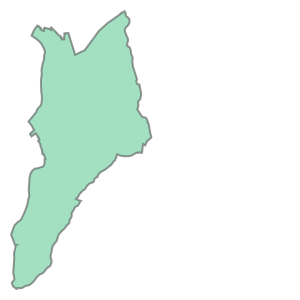

In [220]:
london_borough.iloc[0,-3]

In [20]:
london_ward.BOROUGH.unique()

array(['Kingston upon Thames', 'Croydon', 'Bromley', 'Hounslow', 'Ealing',
       'Havering', 'Hillingdon', 'Harrow', 'Brent', 'Barnet', 'Lambeth',
       'Southwark', 'Lewisham', 'Greenwich', 'Bexley', 'Enfield',
       'Waltham Forest', 'Redbridge', 'Sutton', 'Richmond upon Thames',
       'Merton', 'Wandsworth', 'Hammersmith and Fulham',
       'Kensington and Chelsea', 'Westminster', 'Camden', 'Tower Hamlets',
       'Islington', 'Hackney', 'Haringey', 'Newham',
       'Barking and Dagenham', 'City of London'], dtype=object)

In [13]:
test_point=london_airbnb.loc[0,'geometry']

In [14]:
london_ward.loc[0,'BOROUGH']

'Kingston upon Thames'

In [15]:
test_ward=london_ward.loc[0,'geometry']

In [38]:
tube_table=pd.read_csv(os.path.join(ROOT_PATH,'cw_Data','tube_table.txt'))

In [45]:
tube_table.to_csv('tube_table.txt',index=None)

In [28]:
for key,df_temp in london_ward.groupby('NAME'):
    pass

In [37]:
shape=df_temp.iloc[0,-1]

In [40]:
london_airbnb.shape

(47423, 5)

In [51]:
london_ward.head(5)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."


In [48]:
london_airbnb.head(20)

,Field1,Scrape_ID,lat,lon,geometry
0,0,2.017030e+13,51.479399,-0.192875,POINT (525588.052 177152.582)
1,1,2.017030e+13,51.472087,-0.206380,POINT (524670.176 176316.431)
2,2,2.017030e+13,51.501831,-0.221650,POINT (523529.367 179598.221)
3,3,2.017030e+13,51.484496,-0.206113,POINT (524654.945 177696.851)
4,4,2.017030e+13,51.473387,-0.193706,POINT (525546.793 176482.640)
5,5,2.017030e+13,51.517149,-0.225530,POINT (523218.793 181295.104)
6,6,2.017030e+13,51.489370,-0.220000,POINT (523677.587 178215.264)
7,7,2.017030e+13,51.467926,-0.186638,POINT (526052.709 175887.507)
8,8,2.017030e+13,51.513121,-0.225662,POINT (523220.474 180846.976)
9,9,2.017030e+13,51.515079,-0.234663,POINT (522590.648 181049.531)


In [286]:
london_poi_attr=gpd.read_file('poi_group/poi_attraction.shp')

In [287]:
london_poi_attr.shape

(9612, 30)

In [288]:
poi_ward=[]
for poi in tqdm(london_poi_attr['geometry']):
    registered=False
    for key,df_temp in london_ward.groupby('GSS_CODE'):
        ward_shape=df_temp.iloc[0,-1]
        if ward_shape.contains(poi):
            registered=True
            break
    if registered:     
        poi_ward.append(key)
    else:
        poi_ward.append(np.nan)

  0%|          | 0/9612 [00:00<?, ?it/s]

In [140]:
ward=[]
for point_airbnb in tqdm(london_airbnb['geometry']):
    registered=False
    for key,df_temp in london_ward.groupby('GSS_CODE'):
        ward_shape=df_temp.iloc[0,-1]
        if ward_shape.contains(point_airbnb):
            registered=True
            break
    if registered:     
        ward.append(key)
    else:
        ward.append(np.nan)

  0%|          | 0/47423 [00:00<?, ?it/s]

In [143]:
london_whole_temp['ward_code']=ward

D:\Users\Fred\Miniconda3\envs\sta\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [146]:
london_whole_temp['ward_code']

(484,)

In [171]:
london_airbnb['borough']=ward

In [147]:
london_whole_temp.drop(columns='Scrape_ID',inplace=True)

D:\Users\Fred\Miniconda3\envs\sta\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [243]:
london_poi=gpd.read_file('D:/Schoolwork/ucl/0097geocomputation/Data/Lec_Data/poi_temp.shp')

In [248]:
host_condtion=set(','.join(london_airbnb_attribute['Features'].dropna().to_list()).split(','))

In [263]:
london_airbnb_attribute['super_host']=(london_airbnb_attribute['Features'].str.contains('Host Is Superhost'))

In [266]:
london_airbnb_attribute['verified_host']=(london_airbnb_attribute['Features'].str.contains('Host Identity Verified'))

In [261]:
super_host_num=(pd.Series(','.join(london_airbnb_attribute['Features'].dropna().to_list()).split(','))=='Host Identity Verified').sum()

In [267]:
analysis_host=london_whole_temp.merge(london_airbnb_attribute[['ID','verified_host','super_host','Price']],left_on='connect_ID',right_on='ID',how='left')

In [282]:
london_airbnb_attribute

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,super_host,verified_host
0,13306958,https://www.airbnb.com/rooms/13306958,20170304065726,2017-03-05,Moore Park Maisonette,My place is close to Fulham Broadway. You’ll l...,NaN,My place is close to Fulham Broadway. You’ll l...,none,Great neighbourhood in SW London.,Top floor flat.,Super well connected - busses 1 minute from ho...,All areas/,Check-in - and check-out,NaN,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,75179985,https://www.airbnb.com/users/show/75179985,Lucy,2016-06-01,GB,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/7532a1d9-2...,https://a0.muscache.com/im/pictures/7532a1d9-2...,Fulham,1.0,1.0,"email,phone","A Moore Park Road, London, SW6 2DA, United Kin...",Fulham,Hammersmith and Fulham,NaN,London,NaN,SW6 2DA,NaN,"London, United Kingdom",GB,United Kingdom,51.479399,-0.192875,Condominium,Entire home/apt,5.0,1.0,2.0,2.0,Real Bed,"Wireless Internet,Kitchen,Heating,Washer,Essen...",NaN,80.0,NaN,NaN,150.0,25.0,1.0,0.0,1.0,1125.0,9 months ago,NaN,0.0,0.0,0.0,0.0,2017-03-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"51.4793986027,-0.192874753723","Host Has Profile Pic,Is Location Exact",False,False
1,5570655,https://www.airbnb.com/rooms/5570655,20170304065726,2017-03-05,Fulham Garden Flat,Newly decorated sunny garden flat in fulham cl...,A lovely south facing garden flat in Fulham si...,Newly decorated sunny garden flat in fulham cl...,none,"Lovely, safe and quiet residential area with s...","Hairdryer , shampoo etc all available.",Putney Bridge tube on the district line is onl...,Whole flat and garden,We are happy to help you with your stay. Pleas...,We love our flat and appreciate you leaving it...,https://a0.muscache.com/im/pictures/bb4306b3-7...,https://a0.muscache.com/im/pictures/bb4306b3-7...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/bb4306b3-7...,28880140,https://www.airbnb.com/users/show/28880140,Carol,2015-03-06,GB,NaN,within a day,100.0,NaN,https://a0.muscache.com/im/users/28880140/prof...,https://a0.muscache.com/im/users/28880140/prof...,Fulham,1.0,1.0,"email,phone,reviews,manual_offline,jumio","A Fulham Park Gardens, London, SW6 4JX, United...",Fulham,Hammersmith and Fulham,NaN,London,NaN,SW6 4JX,London,"London, United Kingdom",GB,United Kingdom,51.472087,-0.206380,Apartment,Entire home/apt,3.0,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,120.0,NaN,NaN,NaN,30.0,1.0,0.0,2.0,1125.0,a week ago,NaN,17.0,39.0,69.0,344.0,2017-03-04,14.0,2015-04-13,2016-12-29,96.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,NaN,flexible,1.0,0.61,"51.4720866953,-0.206380252204","Host Has Profile Pic,Host Identity Verified,Is...",False,True
2,7668448,https://www.airbnb.com/rooms/7668448,20

In [274]:
analysis_host.dropna(subset=['verified_host','super_host','Price'],axis=0,inplace=True)

In [351]:
boxes={key:df_temp['Price'].dropna().to_list() for key,df_temp in london_airbnb_attribute.groupby('Room Type')}

In [362]:
scs.pearsonr(analysis_host['Price'],analysis_host['verified_host'])

(0.10638414025520981, 3.4971411568619525e-119)

In [367]:
room_type_count=london_airbnb_attribute.groupby('Room Type').size().to_dict()

In [368]:
room_type_count

{'Entire home/apt': 24650, 'Private room': 22203, 'Shared room': 570}

In [387]:
london_ward_count=london_whole_temp.groupby(['ward_code','ward']).size().reset_index()

In [390]:
london_ward.shape

(649, 8)

In [391]:
london_ward_count.shape

(483, 3)

No handles with labels found to put in legend.


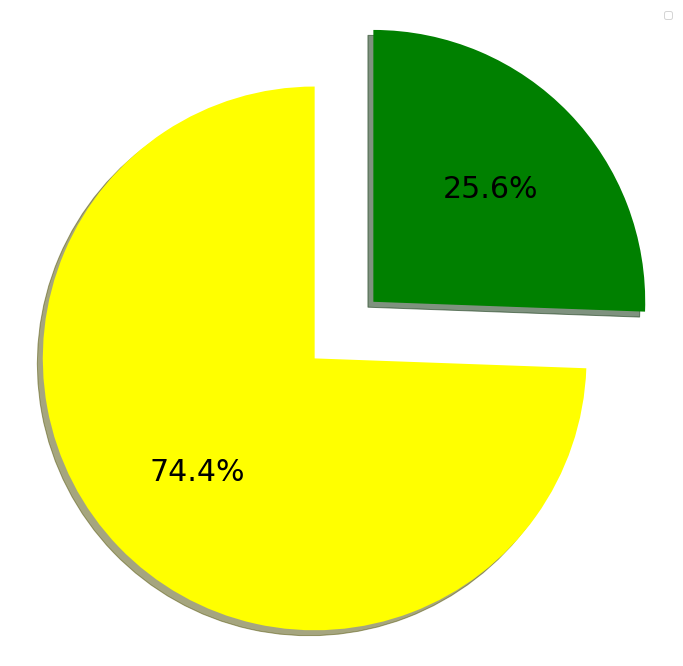

In [404]:
sizes = [483,649-483]
explode = (.3, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
aa=list(room_type_count.keys())
aa[0]='Entire home/Apartment'
fig1, ax1 = plt.subplots(figsize=[12,12])
ax1.pie(sizes,explode=explode,  autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 30},colors=['yellow','g'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()
plt.show()

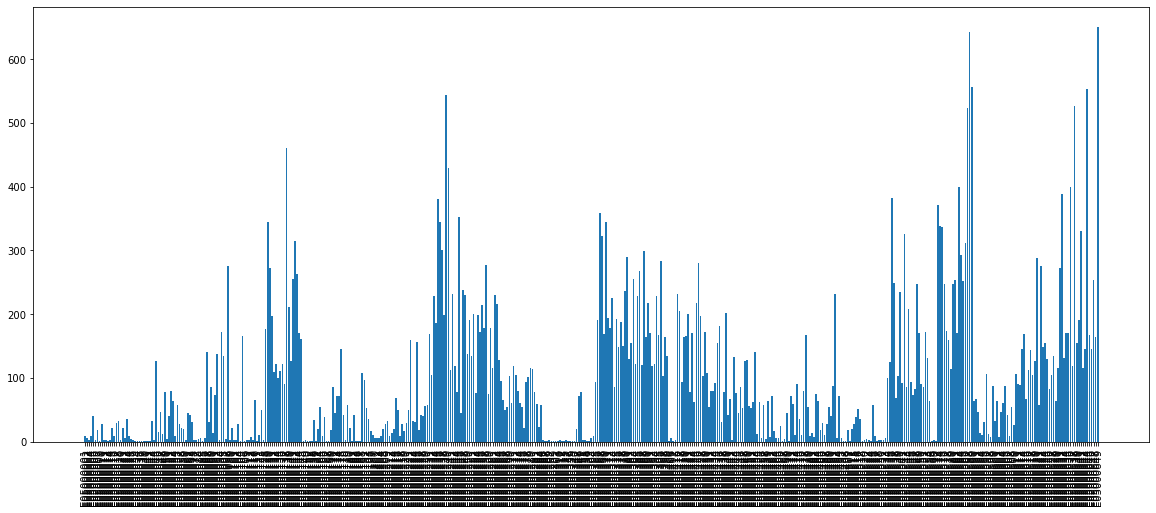

In [389]:
plt.figure(figsize=[20,8])
plt.bar(london_ward_count['ward_code'],london_ward_count[0])
plt.xticks(rotation='vertical',)
plt.show()

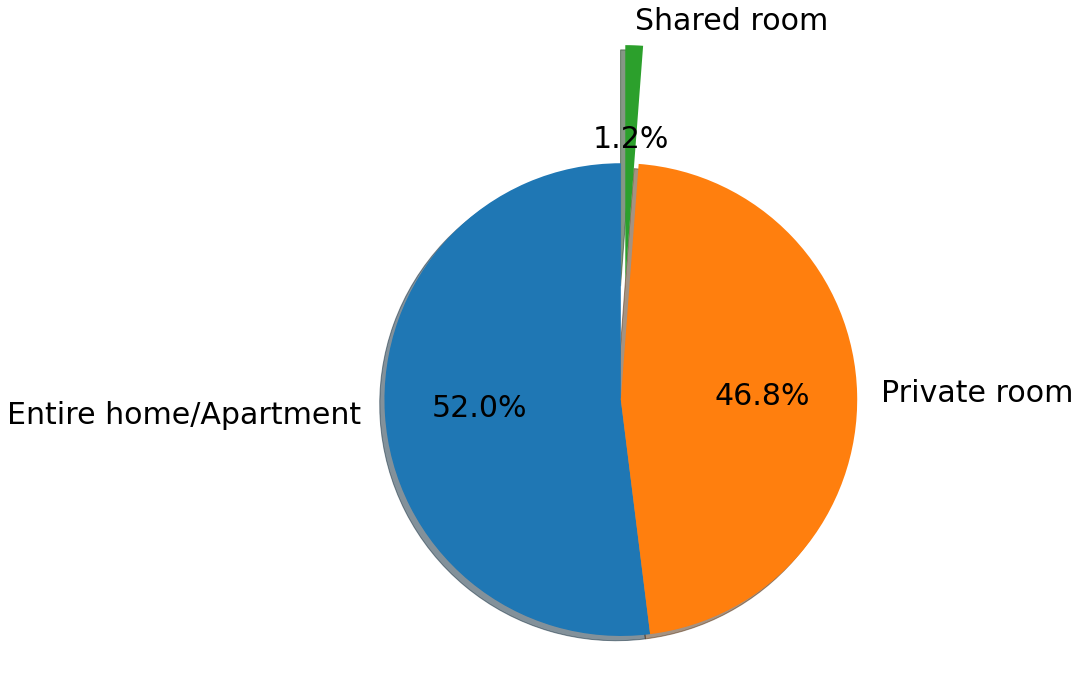

In [382]:
# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0, .5)  # only "explode" the 2nd slice (i.e. 'Hogs')
aa=list(room_type_count.keys())
aa[0]='Entire home/Apartment'
fig1, ax1 = plt.subplots(figsize=[12,12])
ax1.pie(room_type_count.values(),explode=explode, labels=aa, autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 30})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

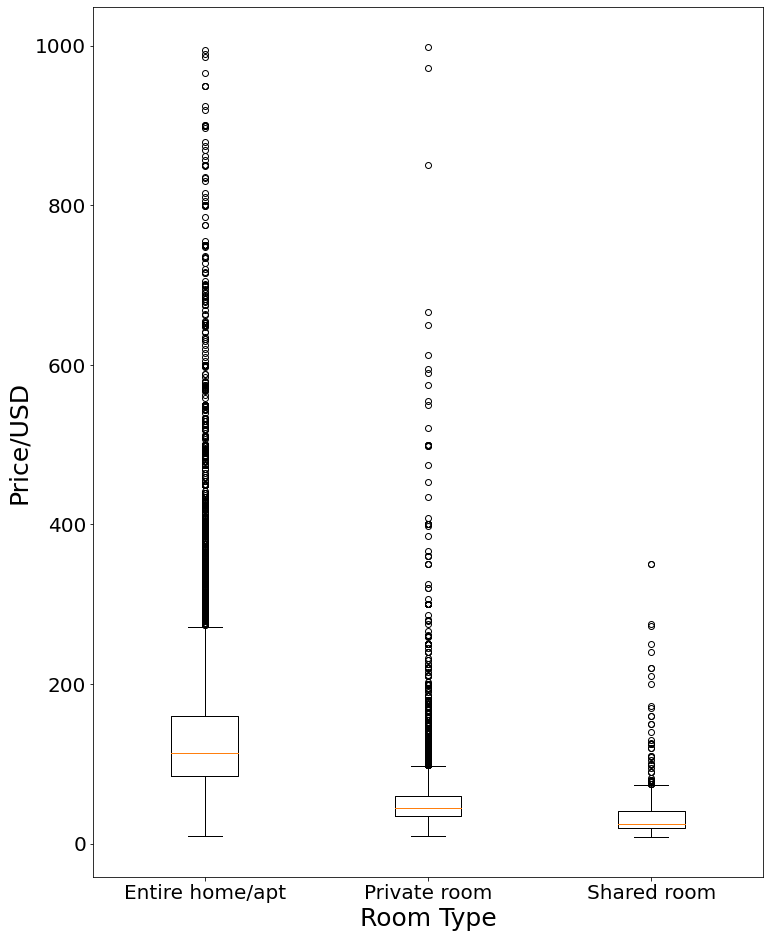

In [360]:
# plt.figure(figsize=[8,16])
fig, ax = plt.subplots(figsize=[12,16])
ax.boxplot(boxes.values())
ax.set_xticklabels(boxes.keys(),fontsize=20)
# ax.set_yticklabels(,fontsize=20)
plt.yticks(size=20)
ax.set_ylabel('Price/USD',fontsize=25)
ax.set_xlabel('Room Type',fontsize=25)
plt.show()

In [334]:
analysis_host[analysis_host['verified_host']==True]

,Field1,lat,lon,borough,min_distan,ward,geometry,connect_ID,borough_connect,ward_code,NAME,GSS_CODE,inner,near_river,ID,verified_host,super_host,Price
1,1,51.472087,-0.206380,Hammersmith and Fulham,453.100572,Town,POINT (524670.176 176316.431),5570655,Hammersmith and Fulham,E05000264,Hammersmith and Fulham,E09000013,1.0,1.0,5570655,True,False,120.0
4,4,51.473387,-0.193706,Hammersmith and Fulham,555.745054,Parsons Green and Walham,POINT (525546.793 176482.640),11632615,Hammersmith and Fulham,E05000260,Hammersmith and Fulham,E09000013,1.0,1.0,11632615,True,False,350.0
5,5,51.517149,-0.225530,Hammersmith and Fulham,567.372412,College Park and Old Oak,POINT (523218.793 181295.104),7270274,Hammersmith and Fulham,E05000253,Hammersmith and Fulham,E09000013,1.0,1.0,7270274,True,False,180.0
7,7,51.467926,-0.186638,Hammersmith and Fulham,1180.675468,Sands End,POINT (526052.709 175887.507),4123151,Hammersmith and Fulham,E05000262,Hammersmith and Fulham,E09000013,1.0,1.0,4123151,True,False,90.0
9,9,51.515079,-0.234663,Hammersmith and Fulham,774.948721,College Park and Old Oak,POINT (522590.648 181049.531),16834704,Hammersmith and Fulham,E05000253,Hammersmith and Fulham,E09000013,1.0,1.0,16834704,True,False,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47411,47411,51.519850,-0.158888,Westminster,272.707492,Bryanston and Dorset Square,POINT (527834.808 181709.617),2835846,Westminster,E05000632,Westminster,E09000033,1.0,1.0,2835846,True,False,145.0
47414,47414,51.523340,-0.172781,Westminster,382.358124,Church Street,POINT (526861.309 182073.597),6631757,Westminster,E05000634,Westminster,E09000033,1.0,1.0,6631757,True,False,89.0
47415,47415,51.488038,-0.142980,Westminster,688.085282,Warwick,POINT (529028.203 178199.958),15937306,Westminster,E05000647,Westminster,E09000033,1.0,1.0,15937306,True,False,99.0
47418,47418,51.518691,-0.140030,Westminster,404.420452,West End,POINT (529146.378 181613.851),3791899,Westminster,E05000649,Westminster,E09000033,1.0,1.0,3791899,True,False,150.0


In [250]:
host_condtion

{'Host Has Profile Pic',
 'Host Identity Verified',
 'Host Is Superhost',
 'Instant Bookable',
 'Is Location Exact',
 'Require Guest Phone Verification',
 'Require Guest Profile Picture'}

In [173]:
london_airbnb.to_file('london_airbnb_pro.shp')

C:\Users\Fred\AppData\Local\Temp/ipykernel_3604/1147199743.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  london_airbnb.to_file('london_airbnb_pro.shp')


In [133]:
london_airbnb['borough']=ward

In [135]:
borough_river=london_river_borough['NAME'].unique()

In [152]:
london_borough['near_thames']=london_borough['NAME'].isin(borough_river).astype(int)

In [153]:
london_borough

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,near_thames
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",0
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",0
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",0
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",1
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",0
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",1
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",0
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",0
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",0
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19...",0


In [136]:
borough_river

array(['Hounslow', 'Havering', 'Lambeth', 'Southwark', 'Lewisham',
       'Greenwich', 'Bexley', 'Richmond upon Thames', 'Wandsworth',
       'Hammersmith and Fulham', 'Kensington and Chelsea', 'Westminster',
       'Tower Hamlets', 'Newham', 'Barking and Dagenham',
       'City of London'], dtype=object)

In [134]:
london_airbnb['borough'].isna().sum()

6374

In [71]:
london_airbnb['ward'].isna().sum()

1793

In [69]:
london_airbnb['ward']=ward

In [23]:
str_list

''

In [25]:
df_london['Property Type'].unique()

array(['Condominium', 'Apartment', 'House', 'Bed & Breakfast',
       'Boutique hotel', 'Other', 'Serviced apartment', 'Townhouse',
       'Cabin', 'Dorm', 'Loft', 'Boat', 'Camper/RV', 'Hut', 'Hostel',
       'Bungalow', 'Guesthouse', 'Villa', 'Yurt', 'Ryokan (Japan)',
       'Castle', 'Tent', 'Chalet', 'Igloo', 'Parking Space', 'Cave'],
      dtype=object)

In [293]:
london_poi_attr['ward_code']=poi_ward

In [312]:
ward_attrnum=london_poi_attr.groupby('ward_code')[['groupname']].size().reset_index()

In [318]:
analysis_poi=london_whole_temp.merge(ward_attrnum[['ward_code',0]],left_on='ward_code',right_on='ward_code',how='left')

In [320]:
analysis_poi=analysis_poi.merge(london_airbnb_attribute[['ID','Price']],left_on='connect_ID',right_on='ID',how='left')

In [321]:
analysis_poi

,Field1,lat,lon,borough,min_distan,ward,geometry,connect_ID,borough_connect,ward_code,NAME,GSS_CODE,inner,near_river,0,ID,Price
0,0,51.479399,-0.192875,Hammersmith and Fulham,183.685063,Parsons Green and Walham,POINT (525588.052 177152.582),13306958,Hammersmith and Fulham,E05000260,Hammersmith and Fulham,E09000013,1.0,1.0,8.0,13306958,80.0
1,1,51.472087,-0.206380,Hammersmith and Fulham,453.100572,Town,POINT (524670.176 176316.431),5570655,Hammersmith and Fulham,E05000264,Hammersmith and Fulham,E09000013,1.0,1.0,6.0,5570655,120.0
2,2,51.501831,-0.221650,Hammersmith and Fulham,347.554914,Addison,POINT (523529.367 179598.221),7668448,Hammersmith and Fulham,E05000250,Hammersmith and Fulham,E09000013,1.0,1.0,3.0,7668448,99.0
3,3,51.484496,-0.206113,Hammersmith and Fulham,701.323050,North End,POINT (524654.945 177696.851),13958516,Hammersmith and Fulham,E05000258,Hammersmith and Fulham,E09000013,1.0,1.0,17.0,13958516,75.0
4,4,51.473387,-0.193706,Hammersmith and Fulham,555.745054,Parsons Green and Walham,POINT (525546.793 176482.640),11632615,Hammersmith and Fulham,E05000260,Hammersmith and Fulham,E09000013,1.0,1.0,8.0,11632615,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47418,47418,51.518691,-0.140030,Westminster,404.420452,West End,POINT (529146.378 181613.851),3791899,Westminster,E05000649,Westminster,E09000033,1.0,1.0,316.0,3791899,150.0
47419,47419,51.508774,-0.133542,Westminster,150.882778,St. James's,POINT (529624.663 180522.517),13444410,Westminster,E05000644,Westminster,E09000033,1.0,1.0,431.0,13444410,89.0
47420,47420,51.514946,-0.181393,Westminster,452.066984,Lancaster Gate,POINT (526287.045 181125.283),11475526,Westminster,E05000638,Westminster,E09000033,1.0,1.0,22.0,11475526,71.0
47421,47421,51.517585,-0.152908,Westminster,446.979392,Marylebone High Street,POINT (528256.058 181468.250),1251720,Westminster,E05000641,Westminster,E09000033,1.0,1.0,98.0,1251720,45.0


In [328]:
analysis_poi.dropna(subset=['Price',0],axis=0,inplace=True)

In [329]:
scs.pearsonr(analysis_poi['Price'],analysis_poi[0])

(0.2013510662379076, 0.0)

In [73]:
london_airbnb.head(50)

,Field1,Scrape_ID,lat,lon,geometry,ward
0,0,2.017030e+13,51.479399,-0.192875,POINT (525588.052 177152.582),Parsons Green and Walham
1,1,2.017030e+13,51.472087,-0.206380,POINT (524670.176 176316.431),NaN
2,2,2.017030e+13,51.501831,-0.221650,POINT (523529.367 179598.221),Addison
3,3,2.017030e+13,51.484496,-0.206113,POINT (524654.945 177696.851),NaN
4,4,2.017030e+13,51.473387,-0.193706,POINT (525546.793 176482.640),Parsons Green and Walham
5,5,2.017030e+13,51.517149,-0.225530,POINT (523218.793 181295.104),College Park and Old Oak
6,6,2.017030e+13,51.489370,-0.220000,POINT (523677.587 178215.264),Hammersmith Broadway
7,7,2.017030e+13,51.467926,-0.186638,POINT (526052.709 175887.507),Sands End
8,8,2.017030e+13,51.513121,-0.225662,POINT (523220.474 180846.976),College Park and Old Oak
9,9,2.017030e+13,51.515079,-0.234663,POINT (522590.648 181049.531),College Park and Old Oak


In [77]:
london_airbnb.to_file('london_airbnb_ward.shp')